In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# reading the youth model dataset 
youth_model = pd.read_csv("datasets/youth_model.csv")

youth_model.head()

,hmlsmorethan1Yr,dv_neglect,dv_physical,dv_physical_rel,dv_sexual_rel,subsabuse,drugabuse,SPA
0,1,1,1,1,0,0,0,4
1,1,0,0,0,1,0,0,4
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,4


In [3]:
youth_model.isnull().sum()

hmlsmorethan1Yr    0
dv_neglect         0
dv_physical        0
dv_physical_rel    0
dv_sexual_rel      0
subsabuse          0
drugabuse          0
SPA                0
dtype: int64

In [4]:
youth_model.dtypes

hmlsmorethan1Yr    int64
dv_neglect         int64
dv_physical        int64
dv_physical_rel    int64
dv_sexual_rel      int64
subsabuse          int64
drugabuse          int64
SPA                int64
dtype: object

In [5]:
print(youth_model.columns.tolist())

['hmlsmorethan1Yr', 'dv_neglect', 'dv_physical', 'dv_physical_rel', 'dv_sexual_rel', 'subsabuse', 'drugabuse', 'SPA']


# Random Forest Model with SMOTE Method 
______


### Train Test Split
______
80 percent goes to training
20 percent goes to testing
42 random test

Target Variable with SMOTE: hmlsmorethan1Yr

Features: dv_neglect, dv_physical, dv_physical_rel, dv_sexual_rel, subsabuse, drugabuse, SPA

In [6]:
# creating our X and y

features = ['dv_neglect', 'dv_physical', 'dv_physical_rel', 'dv_sexual_rel', 'subsabuse', 'drugabuse', 'SPA']

X = youth_model[features]
y = youth_model['hmlsmorethan1Yr']

In [7]:
# Train Test Split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y)

In [8]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [9]:
# Train a classifier (e.g., Random Forest) on the resampled data
# fit the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [20]:
# get the summary of the model
#clf.estimators_

In [10]:
# Score random forest model on resampled train test
clf.score(X_train_resampled, y_train_resampled)

0.6484085862324205

In [11]:
# Score model on test set.
clf.score(X_test, y_test)

0.5503875968992248

In [12]:
# Evaluate the classifier
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       338
           1       0.38      0.48      0.42       178

    accuracy                           0.55       516
   macro avg       0.53      0.53      0.53       516
weighted avg       0.58      0.55      0.56       516



In [13]:
importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

           Feature  Importance
6              SPA    0.403786
4        subsabuse    0.157347
0       dv_neglect    0.109780
5        drugabuse    0.103997
3    dv_sexual_rel    0.094820
2  dv_physical_rel    0.067504
1      dv_physical    0.062765


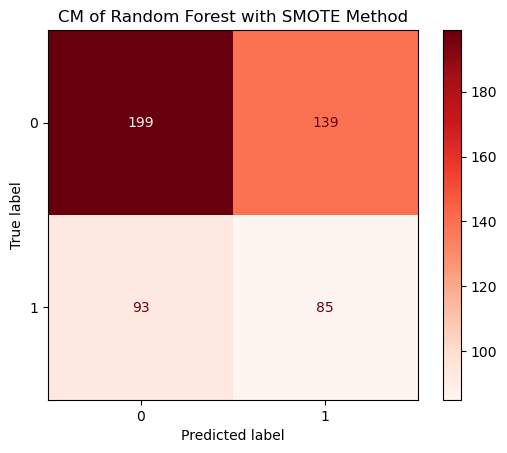

In [14]:
# Confusion Matrix Display with the SMOTE method
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap = 'Reds')

# Get the axis of the plot
ax = plt.gca()

# Set the title
ax.set_title('CM of Random Forest with SMOTE Method')

#save
plt.savefig("cm_random_forest_smote.png", dpi = 100);

In [15]:
# Generate a confusion matrix.
def find_cm(y_test, preds):
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    
    print(f"TN: {tn}\nFP: {fp}\nFN: {fn}\nTP: {tp}")
    
    print(f"Sensitivity: {tp/(tp+fn)}\nSpecificity: {tn/(tn+fp)}")

In [16]:
# Confusion Matrix of Random Forest Model with the SMOTE method
find_cm(y_test, preds)

TN: 199
FP: 139
FN: 93
TP: 85
Sensitivity: 0.47752808988764045
Specificity: 0.5887573964497042


# Confusion Matrix Interpretation from Random Forest Model with SMOTE Method
________

Youth who stayed homeless more than 1 year as our target / positive outcome:

* Our model correctly predicted 199 times that the youth did not stay homeless more than 1 year.
* Our model incorrectly predicted 139 times that youth stayed homeless more than 1 year when they actually did not.
* Our model incorrectly predicted 93 times that youth did not stay homeless more than 1 year when they actually did.
* Our model correctly predicted 85 times that youth stayed homeless more than 1 year.

The model has a relatively higher specificity of 0.5888 compared to sensitivity of 0.4775, which means it's better at correctly identifying negative cases (youth who did not stay homeless more than 1 year) than positive cases (youth who stayed homeless more than 1 year).

While the model shows some capability in identifying negative cases, it may require further tuning or improvements to better capture positive cases, especially reducing false negatives.

# Random Forest Model with SMOTEN Method
_______

### Train Test Split
______
80 percent goes to training
20 percent goes to testing
42 random test

Target Variable with SMOTE: hmlsmorethan1Yr

Features: dv_neglect, dv_physical, dv_physical_rel, dv_sexual_rel, subsabuse, drugabuse, SPA

In [33]:
# creating our X and y

features = ['dv_neglect', 'dv_physical', 'dv_physical_rel', 'dv_sexual_rel', 'subsabuse', 'drugabuse', 'SPA']

X = youth_model[features]
y = youth_model['hmlsmorethan1Yr']

In [34]:
# Train Test Split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y)

In [35]:
# Apply SMOTEN for oversampling since all features are categorical


smoten = SMOTEN(random_state=42)

X_train_resampled, y_train_resampled = smoten.fit_resample(X_train, y_train)

In [36]:
# Train a classifier (e.g., Random Forest) on the resampled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [37]:
# Score random forest model on resampled train test
rf.score(X_train_resampled, y_train_resampled)

0.6506291635825314

In [38]:
# Score model on test set.
rf.score(X_test, y_test)

0.5755813953488372

In [28]:
# Evaluate the classifier
preds = rf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       338
           1       0.40      0.44      0.42       178

    accuracy                           0.58       516
   macro avg       0.54      0.54      0.54       516
weighted avg       0.59      0.58      0.58       516



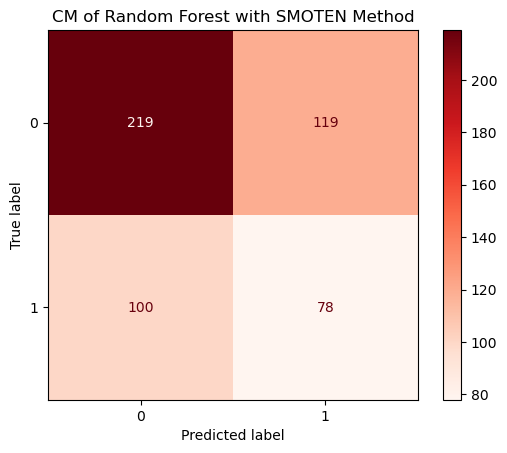

In [31]:
# Confusion Matrix Display with the SMOTE method
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap = 'Reds')

# Get the axis of the plot
ax = plt.gca()

# Set the title
ax.set_title('CM of Random Forest with SMOTEN Method')

#save
plt.savefig("cm_random_forest_smoten.png", dpi = 100);

In [30]:
# Confusion Matrix of Random Forest Model with the SMOTEN method
find_cm(y_test, preds)

TN: 219
FP: 119
FN: 100
TP: 78
Sensitivity: 0.43820224719101125
Specificity: 0.6479289940828402


# Confusion Matrix Interpretation from Random Forest Model with SMOTEN Method
________

Youth who stayed homeless more than 1 year as our target / positive outcome:

* Our model correctly predicted 219 times that the youth did not stay homeless more than 1 year.
* Our model incorrectly predicted 119 times that youth stayed homeless more than 1 year when they actually did not.
* Our model incorrectly predicted 100 times that youth did not stay homeless more than 1 year when they actually did.
* Our model correctly predicted 78 times that youth stayed homeless more than 1 year.

The model has a relatively higher specificity of 0.4382 compared to sensitivity of 0.6479, which means it's better at correctly identifying negative cases (youth who did not stay homeless more than 1 year) than positive cases (youth who stayed homeless more than 1 year).

While the model shows some capability in identifying negative cases, it may require further tuning or improvements to better capture positive cases, especially reducing false negatives.

# Logistic Regression with SMOTEN Method 
_______

Includes Standard Scale

In [22]:
# creating our X and y

features = ['dv_neglect', 'dv_physical', 'dv_physical_rel', 'dv_sexual_rel', 'subsabuse', 'drugabuse', 'SPA']

X = youth_model[features]
y = youth_model['hmlsmorethan1Yr']

In [23]:
#scale data
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [24]:
# Apply SMOTEN for oversampling since all features are categorical

smoten = SMOTEN(random_state=42)

X_train_resampled, y_train_resampled = smoten.fit_resample(X_train_ss, y_train)

In [25]:
# fit 
logr = LogisticRegression(max_iter=1_000)
logr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [26]:
# Score random forest model on resampled train test
logr.score(X_train_resampled, y_train_resampled)

0.5362694300518135

In [27]:
# Score model on test set
logr.score(X_test_ss, y_test)

0.5562015503875969

In [31]:
# Coefficients of the features for Logistic Regression
logr.coef_

array([[-0.11612396,  0.03193061,  0.22153954, -0.06292547, -0.07568764,
         0.07163774, -0.1088688 ]])

In [28]:
# Evaluate the classifier
preds = logr.predict(X_test_ss)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64       338
           1       0.38      0.46      0.41       178

    accuracy                           0.56       516
   macro avg       0.53      0.53      0.53       516
weighted avg       0.58      0.56      0.56       516



Text(0.5, 1.0, 'CM of Logistic Regression with SMOTEN Method')

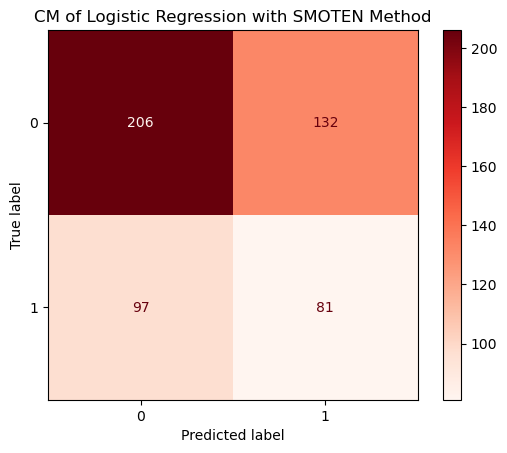

In [29]:
# Confusion Matrix Display with the SMOTE method
ConfusionMatrixDisplay.from_estimator(logr, X_test_ss, y_test, cmap = 'Reds')

# Get the axis of the plot
ax = plt.gca()

# Set the title
ax.set_title('CM of Logistic Regression with SMOTEN Method')

#save

In [30]:
# Confusion Matrix of Logistic Regression Model with the SMOTEN method
find_cm(y_test, preds)

TN: 206
FP: 132
FN: 97
TP: 81
Sensitivity: 0.4550561797752809
Specificity: 0.6094674556213018


# Confusion Matrix Interpretation from Logistic Regression Model with SMOTEN Method
________

Youth who stayed homeless more than 1 year as our target / positive outcome:

* Our model correctly predicted 206 times that the youth did not stay homeless more than 1 year.
* Our model incorrectly predicted 132 times that youth stayed homeless more than 1 year when they actually did not.
* Our model incorrectly predicted 97 times that youth did not stay homeless more than 1 year when they actually did.
* Our model correctly predicted 81 times that youth stayed homeless more than 1 year.

The model has a relatively lower specificity of 0.4551 compared to sensitivity of 0.6095, which means it's better at correctly identifying positive cases (youth who stayed homeless more than 1 year) than negative cases (youth who did not stay homeless more than 1 year).

While the model shows some capability in identifying positive cases, it may require further tuning or improvements to better capture positive cases, especially reducing false negatives.